<a href="https://colab.research.google.com/github/waleedGeorgy/deep-learning/blob/main/Computer_Vision_%26_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction & Data Preparation

**Computer Vision (CV)** is a field of machine and deep learning that focuses on enabling computers to see, or more specifically, to identify and understand visual data, like objects and people in images and videos. Some applications of CV include: object detection, image classification, image segmentation, visual patterns recognition etc., and can be used in many differnet fields, such as agriculture, health, facial recognition, autonomous vehicles, etc.

Typically, CV models are built using **convolutional neural networks (CNNs)** that contain a specialized set of layers that perform specific tasks required for a CV application.

The inputs for CV models comprise of large volumes of visual data like images and videos, and the output is application-dependant. These inputs take the form of n-dimensional tensors, where each value represents a pixel value. For example, if we are working with colored images, then the input will have the shape of (Height, Width, Color Channels) or (H, W, C)

CV applications, as any other type of deep learning application, can be either a regression application or a classification application.

The two main layers of a CNN are:


1.   **Convolutional Layer** - is the main building block of a CNN. It contains a set of filters (kernels), parameters of which can be learned throughout the training. The size of the filters is usually smaller than the actual image. Each filter convolves (slides) along the image and creates an activation map by computing the dot product of the weights and the input, and then adding a bias term. Usually in CNNs, multiple convolutional layers are used sequentially, and each one of them finds more general patterns in the data. In TensorFlow, this layer can be accessed through `tf.keras.layers.Conv2D` (there also exist `tf.keras.layers.Conv1D`, which is typically used for texts, and `tf.keras.layers.Conv3D`).
2.   **Pooling Layer** - also known as a downsample layer, is responsible for reducing the spatial dimensions of the input data, in terms of width and height, while retaining the most important information (learned patterns). In TensorFlow, it can be accessed with `tf.keras.layers.MaxPool2D` for max pooling operation for 2D spatial data, or with `tf.keras.layers.AveragePooling2D` for average pooling operation for 2D spatial data (there also exist 1D and 3D variations).



For starters, we will build a CNN for classifying whether an image contains steak or pizza, using a subset of the [Food101](https://paperswithcode.com/dataset/food-101) dataset (i.e. instead of working with the entire 101 classes of food, we will work with only 2 classes), because in any DL application, it is better to start small, and then add more as needed.

The generic data structure format for a CV classification problem is:
```
pizza_steak <-- top level folder
└─── train <-- training images
│   └─── pizza <-- class_1
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └─── steak <-- class_2
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└─── test <-- testing images
│   └─── pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └─── steak
│       │   100274.jpg
│       │   1653815.jpg
|       |   ...
```
Even if the data is not split into train and test sets, the images must still be placed correctly in aptly named folders (i.e. pizza images must be placed inside the pizza folder, etc.). The train test split can be performed normally with sklearn.

In [ ]:
import tensorflow as tf
import zipfile
import os

# Downloading the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzipping the data
with zipfile.ZipFile('pizza_steak.zip') as zip_ref:
  zip_ref.extractall()

# Removing extra unneeded files
if os.path.isfile("pizza_steak.zip"):
    os.remove("pizza_steak.zip")

if os.path.isfile("pizza_steak.zip.1"):
    os.remove("pizza_steak.zip.1")

if os.path.isfile("pizza_steak.zip.2"):
    os.remove("pizza_steak.zip.2")

--2024-06-04 17:30:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.206.207, 74.125.132.207, 74.125.201.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.206.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   123MB/s    in 0.9s    

2024-06-04 17:30:43 (123 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Inspecting the data
# First we'll inspect the dataset directory
# The base folder has one train and one test folder
!ls pizza_steak

test  train


In [ ]:
# train (and test) folder has one pizza folder and one steak folder
!ls pizza_steak/train

pizza  steak


In [ ]:
# The pizza folder inside the train folder has images of pizza
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
# Checking the directories with os.walk
import os
for dirpath, dirname, filepath in os.walk('pizza_steak'):
  print(f'There are {len(dirname)} folders and {len(filepath)} images in {dirpath}')

There are 2 folders and 0 images in pizza_steak
There are 2 folders and 0 images in pizza_steak/train
There are 0 folders and 750 images in pizza_steak/train/pizza
There are 0 folders and 750 images in pizza_steak/train/steak
There are 2 folders and 0 images in pizza_steak/test
There are 0 folders and 250 images in pizza_steak/test/pizza
There are 0 folders and 250 images in pizza_steak/test/steak


As we can see, the dataset contains 1500 train images and 500 test images.

In [ ]:
# Another way of finding out the number of images in a specific directory
len(os.listdir('pizza_steak/train/pizza'))

750

In [ ]:
# Getting the class names
# We can also simply create a list with the class names
# But we decided to do this programmatically in case we're working with lots of classes
import pathlib
import numpy as np
data_train_dir = pathlib.Path('pizza_steak/train/')
class_names = np.array(sorted([item.name for item in data_train_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Visualizing an image
# We'll create a function that takes in the directory from which we want to visualize in image
# And then visualizes a random image from said directory
import matplotlib.pyplot as plt
import random
from PIL import Image

def view_random_img(target_dir):
  '''
  Visualizes a random image from target_dir
  '''
  random_img = random.sample(os.listdir(target_dir), 1)[0]
  img_path = target_dir + random_img
  img_class = img_path.split('/')[-2]

  img = Image.open(img_path)
  img_shape = img.size + (len(img.mode),)

  plt.axis(False)
  plt.title(f'Image Size (H, W, C): {img_shape} || Image Class: {img_class}')
  plt.imshow(img)

  return img

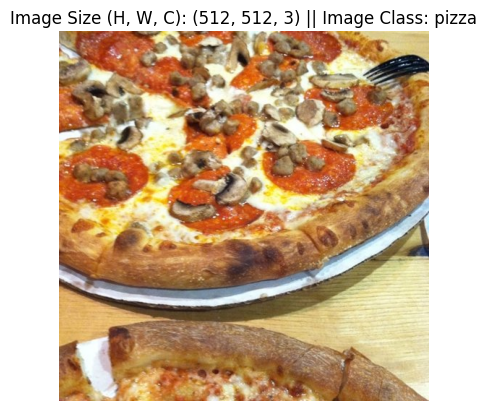

In [ ]:
img = view_random_img('pizza_steak/train/pizza/')

In [ ]:
# Numerical representation of the image we just visualized that will act an the input to a CNN
# Here, each value is the value of red, green and blue for each pixel in the 512x512 image
img_input_tensor = tf.constant(np.array(img))
img_input_tensor

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[156, 135, 106],
        [154, 133, 104],
        [155, 132, 101],
        ...,
        [229, 215, 150],
        [228, 214, 151],
        [226, 212, 149]],

       [[159, 138, 109],
        [158, 137, 106],
        [161, 138, 107],
        ...,
        [229, 215, 150],
        [228, 214, 151],
        [226, 212, 149]],

       [[154, 135, 103],
        [155, 136, 104],
        [156, 135, 104],
        ...,
        [233, 220, 152],
        [232, 218, 153],
        [231, 217, 152]],

       ...,

       [[171, 104,  85],
        [170, 105,  83],
        [167, 103,  76],
        ...,
        [246, 230, 207],
        [255, 250, 227],
        [255, 252, 228]],

       [[169,  99,  91],
        [174, 104,  92],
        [174, 105,  89],
        ...,
        [204, 179, 157],
        [235, 215, 191],
        [242, 224, 200]],

       [[143,  69,  66],
        [154,  81,  75],
        [157,  87,  75],
        ...,
        [157, 129, 10

#Building The First CNN

Now we are going to build our first CNN that will attempt to correctly classify the images we downloaded into pizza images and steak images.

The steps for building a CNN are similar to the steps we are already familiar with, but since we're working with visual data (images in our case) we first need to **load** said images from the directories they reside in, and **preprocess** them into a format that can be fed into a CNN.

Preprocessing in general means:

1.   **Scaling the data** - make the pixel values range from 0 to 1, since, as we already know, it helps the model to train better and converge faster.
2.   **Turning images into batches** - feeding the network all the images at once can cause a huge strain on the network, which may result in the memory to run out before the network is fully trained. Batchifying the images means we're turning the entire images dataset into image batches, and are feeding the network one batch at a time, which helps not only the network to train fully, but also gives the weights more opportunities to update their values to better represent the data.
3.  **Data Augmentation** - is the process of artificially generating new data from existing data, by applying various filters and making small adjustments to existing images (for example mirroring, skeweing, cropping, etc.). This helps the model with finding more patterns in data, and reduces overfitting.

Regarding the architecture, we will replicate the TinyVGG CNN shown in the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.

*Note*: We do not need to split the data into features (the images) and labels (name of the classes the images belong to), TensorFlow will automatically handle this during preprocessing.


In [ ]:
# Building the network
# More information on parameters will be given in the next cell
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

tf.random.set_seed(42)

# Defining the train and test directories
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

# Preprocessing and batchifying the data
train_data = image_dataset_from_directory(directory = train_dir,
                                          batch_size = 32,        # Each batch contains 32 images
                                          image_size = (224,224), # Making all the images have a uniform shape 224x224 (a typically used shape)
                                          shuffle = True,         # Shuffle the data to remove any ordering in the images
                                          label_mode = 'binary',  # binary label mode means that the labels are encoded as float32 scalars with values 0 or 1 (e.g. for binary_crossentropy).
                                          seed = 42)

valid_data = image_dataset_from_directory(directory = test_dir,
                                          batch_size = 32,
                                          image_size = (224,224),
                                          shuffle = True,
                                          label_mode = 'binary',
                                          seed = 42)

# Recreating the TinyVGG model architecture
model_1 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255), # This layer does not exist in TinyVGG, but we added it to normalize the pixel values
    tf.keras.layers.Conv2D(filters = 10, # How many neurons in the convolutional layer
                           activation = 'relu',
                           kernel_size = 3, # Size of the filter/kernel (3x3)
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,  # Size of pooling filter (2x2)
                              strides = None,  # Stide means how many pixels will the pooling filter slide over, none means that the filter will slide to the adjacent pixels
                              padding = 'valid'), # Include padding in the images
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compiling the model
model_1.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fitting the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data), # Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch
                                                           # Here we will have 47 steps per epoch, since we have 1500 train data images split into batches of size 32 (1500/32 = 47)
                        validation_data = valid_data,
                        validation_steps = len(valid_data)) # Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 110s 2s/step - loss: 0.6533 - accuracy: 0.6073 - val_loss: 0.5679 - val_accuracy: 0.6740
Epoch 2/5
47/47 [==============================] - 98s 2s/step - loss: 0.4897 - accuracy: 0.7700 - val_loss: 0.4897 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 95s 2s/step - loss: 0.4303 - accuracy: 0.8107 - val_loss: 0.3699 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 94s 2s/step - loss: 0.3927 - accuracy: 0.8253 - val_loss: 0.3363 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 94s 2s/step - loss: 0.3865 - accuracy: 0.8347 - val_loss: 0.3457 - val_accuracy: 0.8620


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

Great! We just trained our first CNN with a test accuracy of 86.2%!

Now, let's go over the hyperparameters in the convolutional and pooling layers of the CNN we've just built.

**Conv2D**:
*   `filters` = the number of neurons in the convolutional layer, the more filters there are, the more patterns will the model learn from the data.
*   `kernel_size` = the size of the filter/kernel that will convolve/slide over the image. The kernels are square-shaped (in 2D space) meaning that if `kernel_size = 3` then we're using a 3x3 kernel. These kernels find patterns in the input data and create a feature map (activation map) by caculating the dot product between the weights of the kernel and the weights of the image. This feature map will contain all the most important information found by the convolutional layer.
*   `strides` = the number of pixels that the kernel should be shifted over at a time. `strides = 1` means the kernel will slide one pixel at a time.
* `padding` = whether padding (additional pixels on the borders) should be added to the images. This helps the kernels capture more data at the edges of the images, which may lead to better performance. This can also help in preserving the size of the images as they pass through the CNN.

**MaxPool2D**:
*   `pool_size` = the size of the pooling kernel that will slide over the feature map/image. Pooling kernels are also square-shaped. If `pool_size = 2` it means we're using a 2x2 pooling kernel. In this case, the pooling kernel will choose the highest values from each 2x2 square in the feature map and pass it to the next layer.
*   `stides` and `padding` are the same as in the Conv2D layer.

More in-depth information can be found in the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website, that explains all the different parts of a CNN visually

